In [1]:
import numpy as np
import seaborn as sns
import matplotlib as plyplt 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# For clustering
from sklearn.cluster import KMeans

# For imbalance handling
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv('/Users/gres1/Downloads/HR_comma_sep.csv')


In [8]:
df.head 
df.tail

<bound method NDFrame.tail of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [10]:
print (df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [11]:
from IPython.display import display

display(df)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
display(df.head())


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
display(df.tail())


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [14]:
display(df)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [16]:
import pandas as pd

# Load the data
df = pd.read_csv('/Users/gres1/Downloads/HR_comma_sep.csv')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nDataFrame info:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())


Missing values per column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  

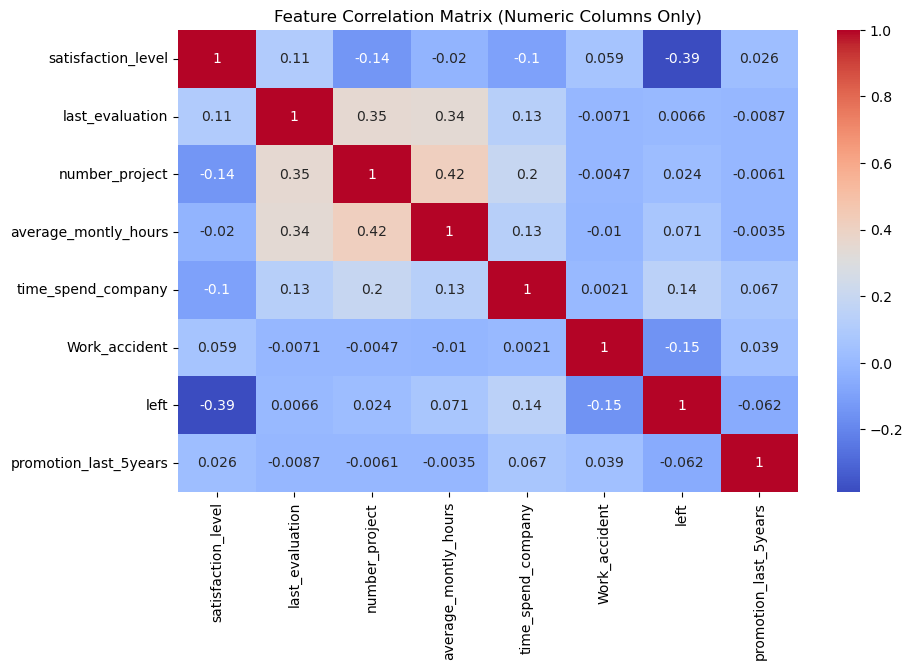

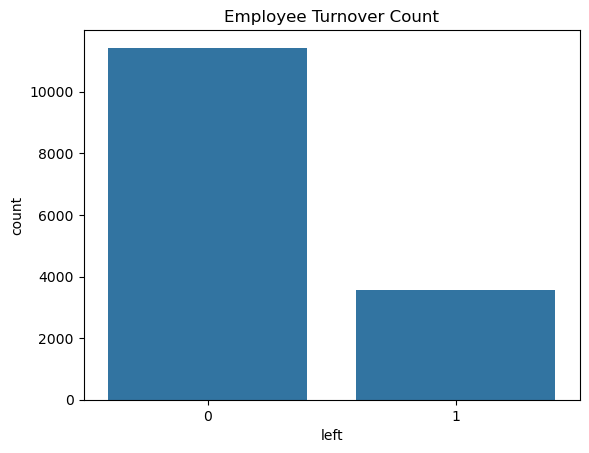

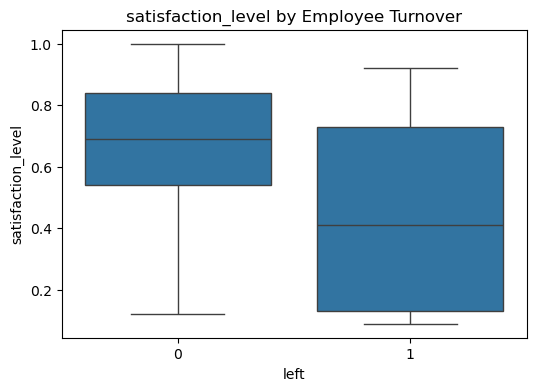

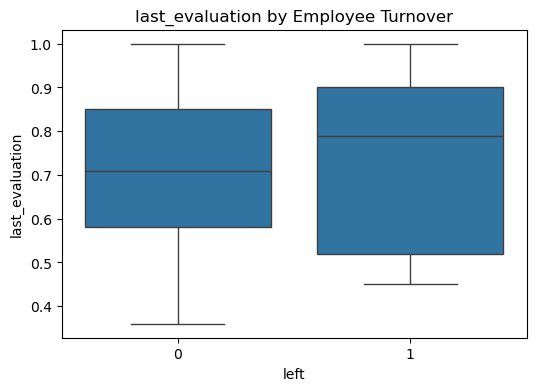

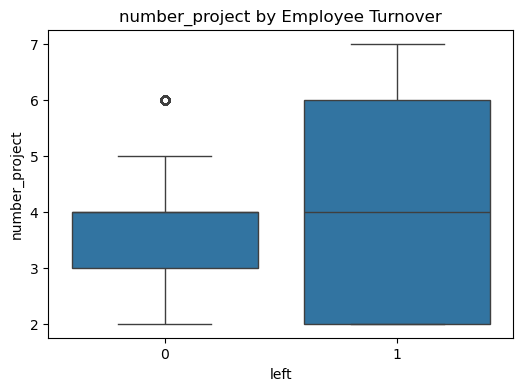

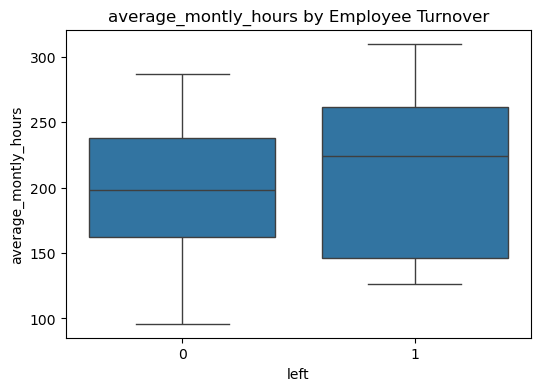

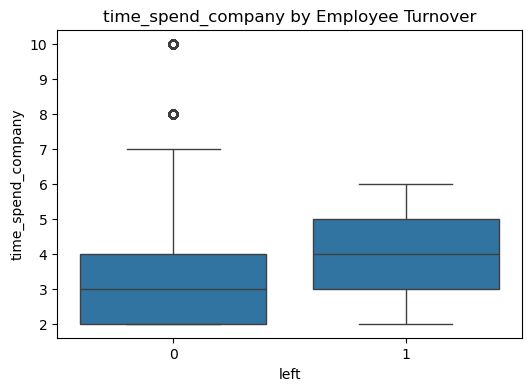

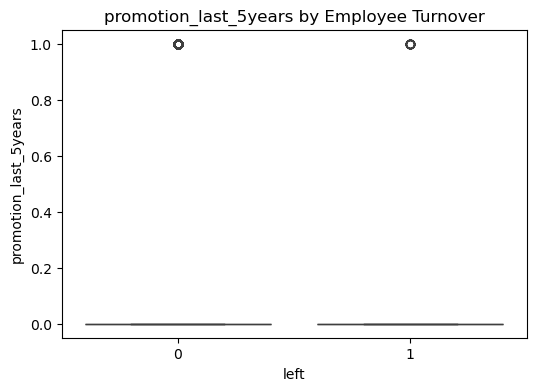

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap on numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix (Numeric Columns Only)')
plt.show()

# Distribution of the target variable
sns.countplot(x='left', data=df)
plt.title('Employee Turnover Count')
plt.show()

# Boxplots of key numeric features grouped by turnover status
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'promotion_last_5years']

for feat in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='left', y=feat, data=df)
    plt.title(f'{feat} by Employee Turnover')
    plt.show()


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('left', axis=1)
y = df['left']

# For simplicity, encode categorical variables first (e.g., 'salary' and 'sales')
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance after SMOTE
print("Original training target distribution:")
print(y_train.value_counts())

print("\nAfter SMOTE training target distribution:")
print(y_train_smote.value_counts())


Original training target distribution:
left
0    9134
1    2865
Name: count, dtype: int64

After SMOTE training target distribution:
left
0    9134
1    9134
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Use StratifiedKFold for balanced splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring function dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

results = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    scores = {}
    for score_name in scoring.keys():
        cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=skf, scoring=scoring[score_name])
        scores[score_name] = np.mean(cv_scores)
    results[name] = scores

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print("\nCross-Validation Performance Metrics:")
print(results_df)


Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating SVM...
Training and evaluating XGBoost...


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


Cross-Validation Performance Metrics:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.797569   0.781467  0.826142  0.803156  0.797569
Decision Tree        0.972849   0.969655  0.975914  0.972686  0.972849
Random Forest        0.985549   0.995644  0.974381  0.985061  0.984891
SVM                  0.684531   0.685122  0.682942  0.683998  0.684530
XGBoost              0.984782   0.988862  0.980622  0.984717  0.984782


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
[[2280   14]
 [  27  679]]
ROC AUC Score: 0.9911865168650327


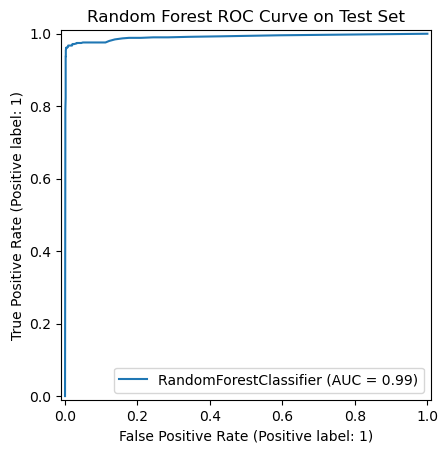

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train on SMOTE-balanced training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC Curve on Test Set")
plt.show()


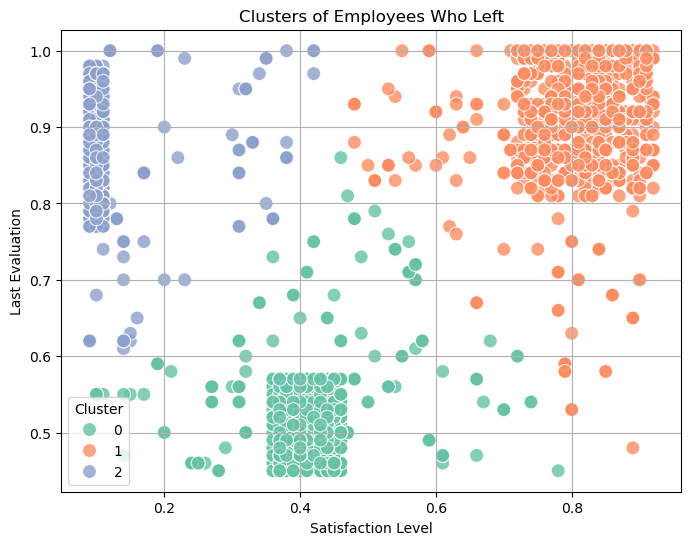

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Filter only employees who left
df_left = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_left['cluster'] = kmeans.fit_predict(df_left)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_left,
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='Set2',
    s=100,
    alpha=0.8
)
plt.title('Clusters of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
